<a href="https://colab.research.google.com/github/tejaspradhan/Sentiment-Analysis/blob/main/code/Sentiment_Analysis_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying a 1-D Convolutional Neural Network on Twitter Data

## Importing the Necessary Libraries

In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import sequence,text
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Embedding, MaxPool1D,Dropout

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import pickle

In [26]:
data = pd.read_csv('/content/train_preprocessed.csv')

In [27]:
data.head()

,Unnamed: 0,label,cleaned_tweet
0,0,0,user when a father is dysfunctional and is so...
1,1,0,user user thanks for lyft credit i cant use c...
2,2,0,bihday your majesty
3,3,0,model i love u take with u all the time in ur
4,4,0,factsguide society now motivation


In [28]:
x,y = data['cleaned_tweet'],data['label']
x.shape,y.shape

((31962,), (31962,))

In [29]:
tokenizer = text.Tokenizer(num_words=50)
tokenizer.fit_on_texts(x)
x_mat = tokenizer.texts_to_matrix(x)
x_vec = sequence.pad_sequences(x_mat,maxlen=50)

In [46]:
resampler = SMOTE()
x_vec,y = resampler.fit_resample(x_vec,y)

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_vec,y,test_size=0.3)

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((41608, 50), (17832, 50), (41608,), (17832,))

In [71]:
model = Sequential()
model.add(Embedding(50,10,input_length=50))
model.add(Conv1D(64, kernel_size=3))
model.add(MaxPool1D())
model.add(Dropout(0.3))
model.add(Conv1D(64, kernel_size=3))
model.add(MaxPool1D())
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [72]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 10)            500       
                                                                 
 conv1d_8 (Conv1D)           (None, 48, 64)            1984      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 22, 64)            12352     
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 11, 64)           0         
 1D)                                                  

In [73]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
history = model.fit(x_train,y_train,epochs = 50, validation_data=(x_test,y_test))

Epoch 1/50
1301/1301 [==============================] - 15s 11ms/step - loss: 0.4804 - accuracy: 0.7606 - val_loss: 0.4419 - val_accuracy: 0.7857
Epoch 2/50
1301/1301 [==============================] - 14s 11ms/step - loss: 0.4318 - accuracy: 0.7940 - val_loss: 0.4369 - val_accuracy: 0.7956
Epoch 3/50
1301/1301 [==============================] - 14s 10ms/step - loss: 0.4114 - accuracy: 0.8042 - val_loss: 0.4158 - val_accuracy: 0.8020
Epoch 4/50
1301/1301 [==============================] - 13s 10ms/step - loss: 0.3966 - accuracy: 0.8134 - val_loss: 0.4019 - val_accuracy: 0.8113
Epoch 5/50
1301/1301 [==============================] - 14s 11ms/step - loss: 0.3845 - accuracy: 0.8192 - val_loss: 0.3948 - val_accuracy: 0.8200
Epoch 6/50
1301/1301 [==============================] - 14s 11ms/step - loss: 0.3750 - accuracy: 0.8230 - val_loss: 0.3829 - val_accuracy: 0.8241
Epoch 7/50
1301/1301 [==============================] - 14s 11ms/step - loss: 0.3678 - accuracy: 0.8280 - val_loss: 0.4002 -

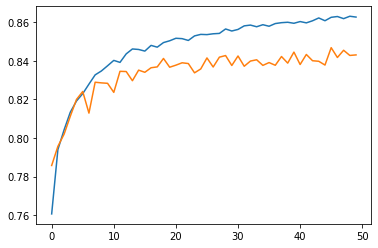

In [75]:
plt.plot(np.arange(0,50),history.history['accuracy'])
plt.plot(np.arange(0,50),history.history['val_accuracy'])
plt.show()

In [76]:
model.save('cnn.h5')

In [78]:
pickle.dump(tokenizer,open('tokenizer','wb'))